<a href="https://colab.research.google.com/github/karthik038/Projects/blob/main/Chennai_House_prices_038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chennai House Price Prediction




### Problem Statement


*   Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?
*  Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.



In [1]:
#Generic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Collection of the dataset
#Independant data/Indepandent variable
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Guvi projects/train-chennai-sale.csv")
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


In [3]:
#dependent data/Target Variable
df.SALES_PRICE

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [4]:
df.shape

(7109, 22)

#### Observation


*  Here we read the dataset we we 7109 datapoints and 22 columns.
*  In this 22 columns one column was the Target variable.





## Data Pre-processing

In [5]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
df['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [8]:
df['N_BATHROOM'].unique()

array([ 1.,  2., nan])

In [9]:
df['QS_ROOMS'].unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [10]:
df['QS_BATHROOM'].unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [11]:
df['QS_BEDROOM'].unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [12]:
df['QS_OVERALL'].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

#### observations


*   And here we used info,unique_values to explore what kind of datapoints inside some the columns.



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [14]:
#Converting the N_bedroom and N_bathroom datatypes from float64 to Int64
df['N_BEDROOM']=df['N_BEDROOM'].astype("Int64")
df['N_BATHROOM']=df['N_BATHROOM'].astype("Int64")

In [15]:
#Converting the DATE_SALE and DATE_BUILD datatypes from object to Datetime 
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"],infer_datetime_format =True)
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"],infer_datetime_format =True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   Int64         
 6   N_BATHROOM     7104 non-null   Int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [17]:
#Dropping PRT_ID,REG_FEE,COMMIScolumns
df1 = df.drop(['PRT_ID','REG_FEE','COMMIS'], axis='columns')
df1.head(1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,7600000


#### observations 


*   Here we dropped some the columns because these columns are odd to the dataset.



In [18]:
#Updating new features to the dataframe
df1['HOUSE_AGE'] = df['DATE_SALE']-df['DATE_BUILD']
df1['HOUSE_AGE'].head()

0   16031 days
1    4015 days
2    7358 days
3    8030 days
4   10802 days
Name: HOUSE_AGE, dtype: timedelta64[ns]

In [19]:
#converting the days as a 1 calender year
df1['HOUSE_AGE'] = df1['HOUSE_AGE']/np.timedelta64(1,'Y')
df1['HOUSE_AGE'] = np.round(df1['HOUSE_AGE'])
df1['HOUSE_AGE'].head()

0    44.0
1    11.0
2    20.0
3    22.0
4    30.0
Name: HOUSE_AGE, dtype: float64

#### Observations


*   We have subracted the date sale and date buid columns to make the a column House age to have more accuracy over the dataset.



In [20]:
df1['HOUSE_AGE'] = df1['HOUSE_AGE'].astype(int)

In [21]:
#Dropping the DATE_BUILD and DATE_SALE columns from the dataset
df2 = df1.copy()
df2 = df1.drop(['DATE_BUILD','DATE_SALE'], axis=1)
df2.head(1)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,7600000,44


In [22]:
features = [feature for feature in df2.columns if df2[feature].dtypes == "O"]
features = df2[features]
for feature in features:
  print("The feature is {} and number of categories are  = {}".format(feature,(df2[feature].unique())))

The feature is AREA and number of categories are  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
The feature is SALE_COND and number of categories are  = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
The feature is PARK_FACIL and number of categories are  = ['Yes' 'No' 'Noo']
The feature is BUILDTYPE and number of categories are  = ['Commercial' 'Others' 'Other' 'House' 'Comercial']
The feature is UTILITY_AVAIL and number of categories are  = ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
The feature is STREET and number of categories are  = ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
The feature is MZZONE and number of categories are  = ['A' 'RH' 'RL' 'I' 'C' 'RM']


In [23]:
#Using Replacement Function To Correct The Spelling Mistakes
df2['AREA'].replace(['Ann Nagar','Ana Nagar','Adyr','Chormpet','Chrompt','Chrmpet','TNagar','Velchery','KKNagar','Karapakam'],
                    ['Anna Nagar','Anna Nagar','Adyar','Chrompet','Chrompet','Chrompet','T Nagar','Velachery','KK Nagar','Karapakkam'], inplace=True)
df2['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'], inplace=True)
df2['PARK_FACIL'].replace(['Noo'],['No'], inplace=True)
df2['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'], inplace=True)
df2['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'], inplace=True)
df2['UTILITY_AVAIL'].replace(['All Pub','NoSewr '],['AllPub','NoSeWa'], inplace=True)

#### Observations


*   We have been checking all kind of spelling errors over the dataset to make the dataset more accurate.



In [24]:
df2.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
HOUSE_AGE         0
dtype: int64

In [25]:
#filling the null values with mode
df2['N_BEDROOM'] = df2['N_BEDROOM'].fillna(df2['N_BEDROOM'].mode()[0])
df2['N_BATHROOM'] = df2['N_BATHROOM'].fillna(df2['N_BATHROOM'].mode()[0])

In [26]:
#filling the null values with mean
QS_OVERALL_mean = df2["QS_OVERALL"].mean()
df2["QS_OVERALL"].fillna(QS_OVERALL_mean, inplace = True)

In [27]:
df2.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
HOUSE_AGE        0
dtype: int64

#### Observations 


*   Seems there are null values in the dataset so we filled the categorical column null values with Mode and continous column null values with Mean.



## EDA

### Analysis on categorical features

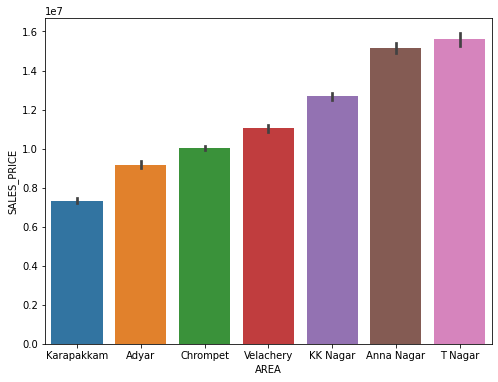

In [28]:
plt.figure(figsize= (8,6))
sns.barplot(x="AREA",y="SALES_PRICE",data=df2,order=df2.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

In [29]:
df2["AREA"] = df2["AREA"].map({"Karapakkam": 0 , "Adyar" : 1, "Chrompet":2 , "Velachery" : 3 , "KK Nagar" : 4 , "Anna Nagar" : 5, "T Nagar": 6})

#### Observations


*   Here the AREA column vs SALES PRICE and has a good linearity and we encoded the column with giving higher numericals to the high linerity datapoint


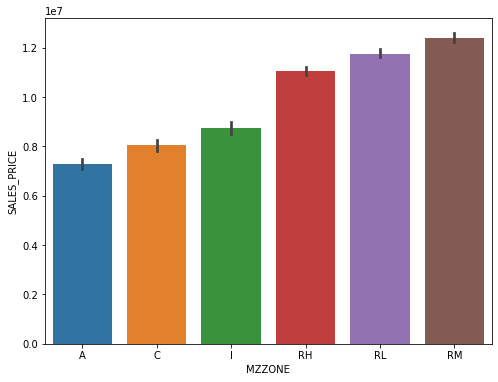

In [30]:
plt.figure(figsize= (8,6))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df2,order=df2.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

In [31]:
df2["MZZONE"] = df2["MZZONE"].map({"A": 0 , "C" : 1, "I": 2, "RH": 3, "RL" : 4, "RM" : 5})

#### Observations


*   As same with the MZZONE column vs SALES PRICE and we have encoded and given the higher numericals to the higher linear datapoint



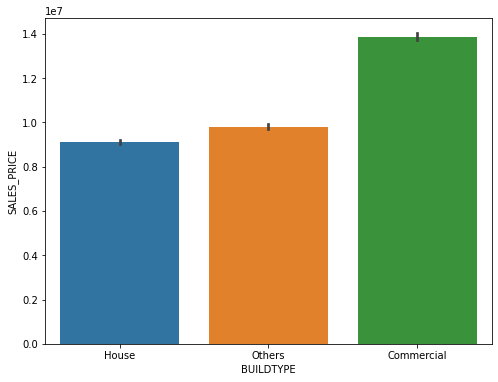

In [32]:
plt.figure(figsize= (8,6))
sns.barplot(x="BUILDTYPE",y="SALES_PRICE",data=df2,order=df2.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])

In [33]:
df2["BUILDTYPE"] = df2["BUILDTYPE"].map({"House": 0 , "Others" : 1 , "Commercial" : 2})

#### Observations


*   We ploted the BUILDTYPE column vs SALES PRICE and we have Encoded the data as per linearity base


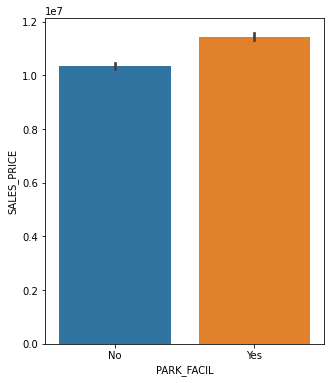

In [34]:
plt.figure(figsize= (5,6))
sns.barplot(x="PARK_FACIL", y ="SALES_PRICE",data=df2,order=df2.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])

In [35]:
df2["PARK_FACIL"] = df2["PARK_FACIL"].map({"No" : 0 , "Yes": 1 })

#### Observations


*   We plotted the PARKING FACILITY vs SALES PRICE and encoded 



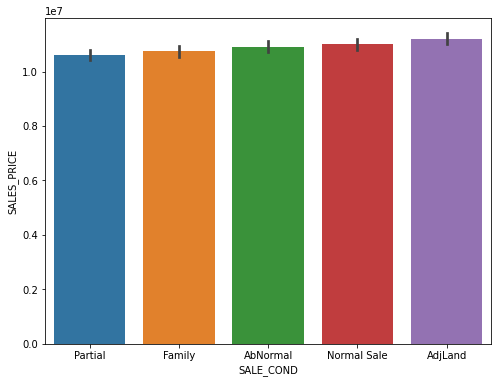

In [36]:
plt.figure(figsize= (8,6))
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=df2,order=df2.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])

#### Observations


*   we plotted the SALE CONDITATION column vs SALES PRICE



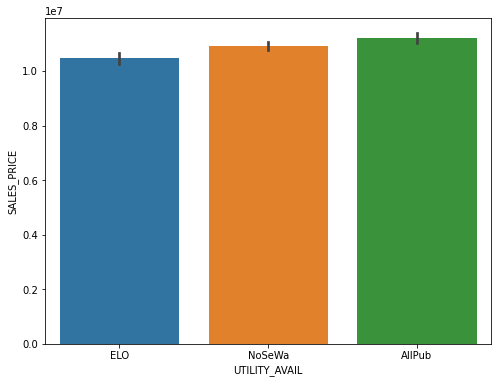

In [37]:
plt.figure(figsize= (8,6))
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=df2,order=df2.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])

#### Observations


*   We plotted the UTILITY AVAILABLE vs SALES PRICE 



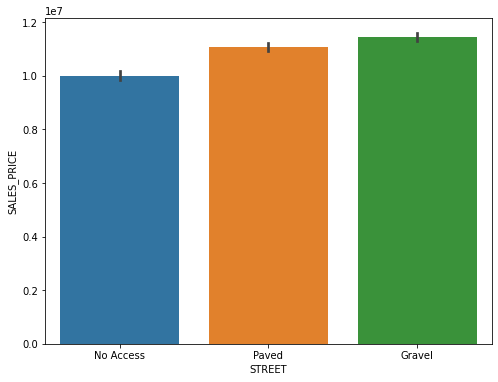

In [38]:
plt.figure(figsize= (8,6))
sns.barplot(x="STREET",y="SALES_PRICE",data=df2,order=df2.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])

In [39]:
df2["STREET"] = df2["STREET"].map({"No Access": 0 , "Paved" : 1, "Gravel":2})

#### Observations


*   we plotted the STREET vs SALES PRICE and encoded



### Analysis on continous features

In [40]:
df2.groupby('HOUSE_AGE')['SALES_PRICE'].mean()

HOUSE_AGE
3     1.142293e+07
4     1.093210e+07
5     1.134105e+07
6     1.161884e+07
7     1.127769e+07
8     1.116946e+07
9     1.128225e+07
10    1.149426e+07
11    1.153234e+07
12    1.123810e+07
13    1.103813e+07
14    1.147625e+07
15    1.146508e+07
16    1.149787e+07
17    1.086510e+07
18    1.133964e+07
19    1.125704e+07
20    1.067254e+07
21    1.116761e+07
22    1.136297e+07
23    1.081155e+07
24    1.124435e+07
25    1.089145e+07
26    1.094506e+07
27    1.090997e+07
28    1.084162e+07
29    1.105236e+07
30    1.072406e+07
31    1.062968e+07
32    1.022121e+07
33    1.074603e+07
34    1.022972e+07
35    1.071783e+07
36    1.048599e+07
37    1.037997e+07
38    1.013738e+07
39    1.063477e+07
40    1.065277e+07
41    1.043039e+07
42    1.152310e+07
43    1.140136e+07
44    1.057647e+07
45    1.030587e+07
46    9.130826e+06
47    8.016700e+06
48    8.721339e+06
49    7.859473e+06
50    8.385574e+06
51    9.196307e+06
52    8.900300e+06
53    1.022773e+07
54    1.099293e+07
55

In [41]:
df2['Sales_avg'] = df2['SALES_PRICE'].mean()
fig = px.bar(df2, x='HOUSE_AGE', y='Sales_avg')
fig.show()

In [42]:
#df2 = df2.drop(['Sales_avg'], axis='columns')

#### Observations


*   We grouped the HOUSE AGE to see the house ages to get a better view to the HOUSE AGE column
*   And we plotted a plot to with the grouped HOUSE AGE  vs Mean of the SALES PRICE over each of the datapoints in the HOUSE AGE column
*   And we can see that the sales price decreases from the houses above the age of 40 years



In [43]:
fig = px.scatter(df2, x='INT_SQFT', y='SALES_PRICE')
fig.show()

#### Observations

*   As we can see the sales price is more denser and raising in the 600 sqt to 1300 sqft 
*   And also there is a linear raise and dense over the sales price from 1500 sqft to 2000 sqft 
*  And also we can see that there is a little drop of sales price and dense over the datapoints above 2000 sqft



In [44]:
fig =px.bar(df2, x='DIST_MAINROAD', y='Sales_avg')
fig.show()

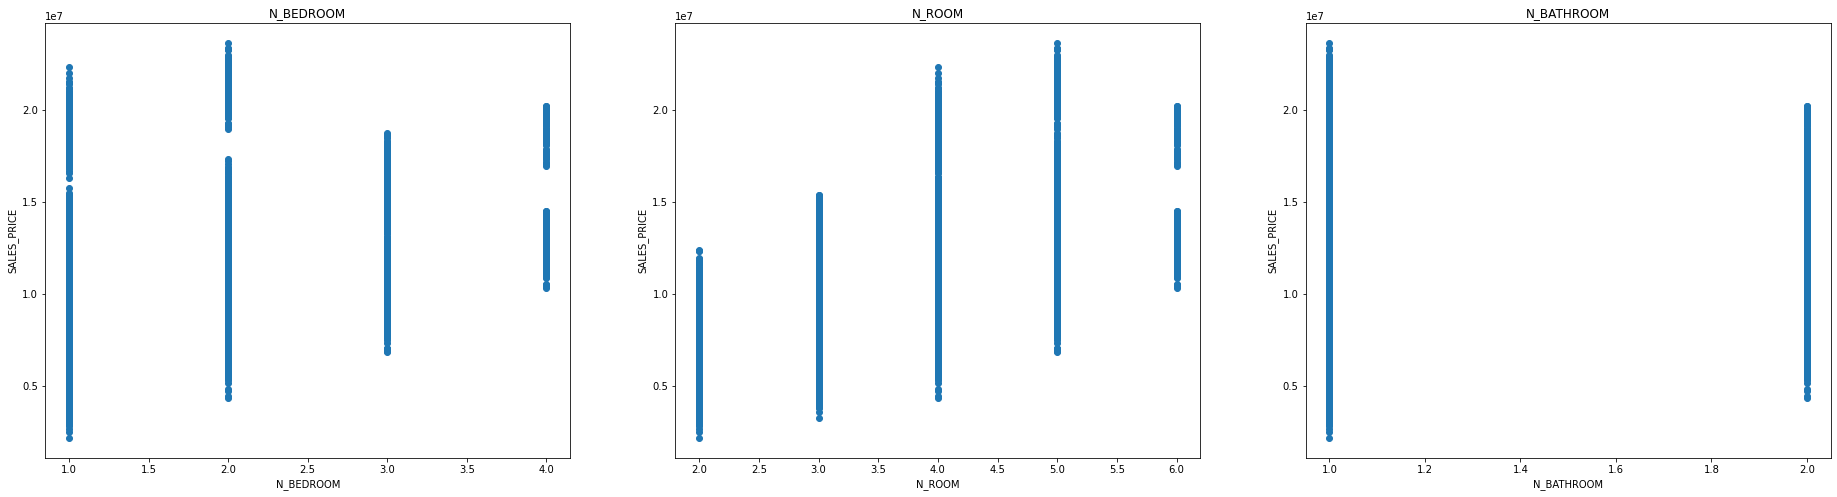

In [45]:
plt.figure(figsize=(32, 8))

features = ['N_BEDROOM','N_ROOM','N_BATHROOM']
target = df2['SALES_PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df2[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('SALES_PRICE')

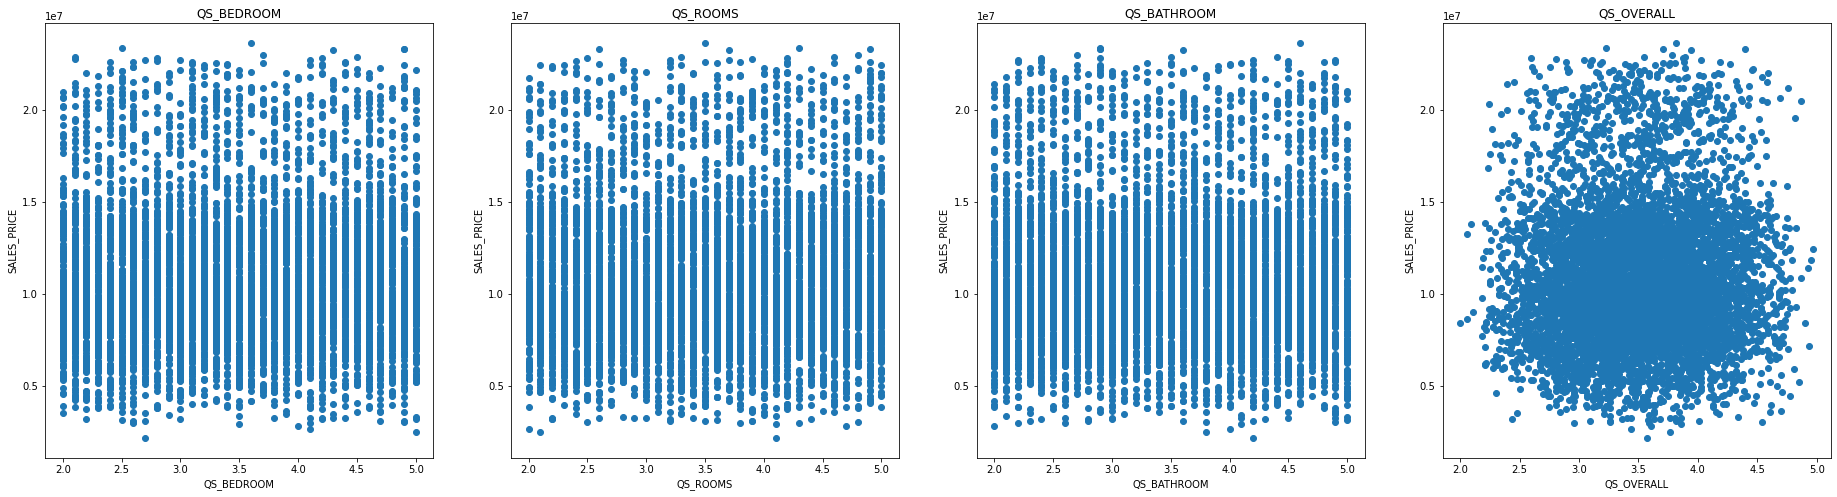

In [46]:
plt.figure(figsize=(32, 8))

features = ['QS_BEDROOM','QS_ROOMS','QS_BATHROOM','QS_OVERALL']
target = df2['SALES_PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df2[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('SALES_PRICE')

## Label Encoding

In [47]:
#Generic Libraries to encode the data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [48]:
#Encoded the SALE_COND and UTILITY_AVAIL columns
df2["SALE_COND"] = label_encoder.fit_transform(df2["SALE_COND"])
df2["UTILITY_AVAIL"] = label_encoder.fit_transform(df2["UTILITY_AVAIL"])
df2.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Sales_avg
0,0,1004,131,1,1,3,0,1,2,0,1,0,4.0,3.9,4.9,4.330,7600000,44,1.089491e+07
1,5,1986,26,2,1,5,0,0,2,0,2,3,4.9,4.2,2.5,3.765,21717770,11,1.089491e+07


In [49]:
df2.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Sales_avg
0,0,1004,131,1,1,3,0,1,2,0,1,0,4.0,3.9,4.9,4.330,7600000,44,1.089491e+07
1,5,1986,26,2,1,5,0,0,2,0,2,3,4.9,4.2,2.5,3.765,21717770,11,1.089491e+07
2,1,909,70,1,1,3,0,1,2,1,2,4,4.1,3.8,2.2,3.090,13159200,20,1.089491e+07


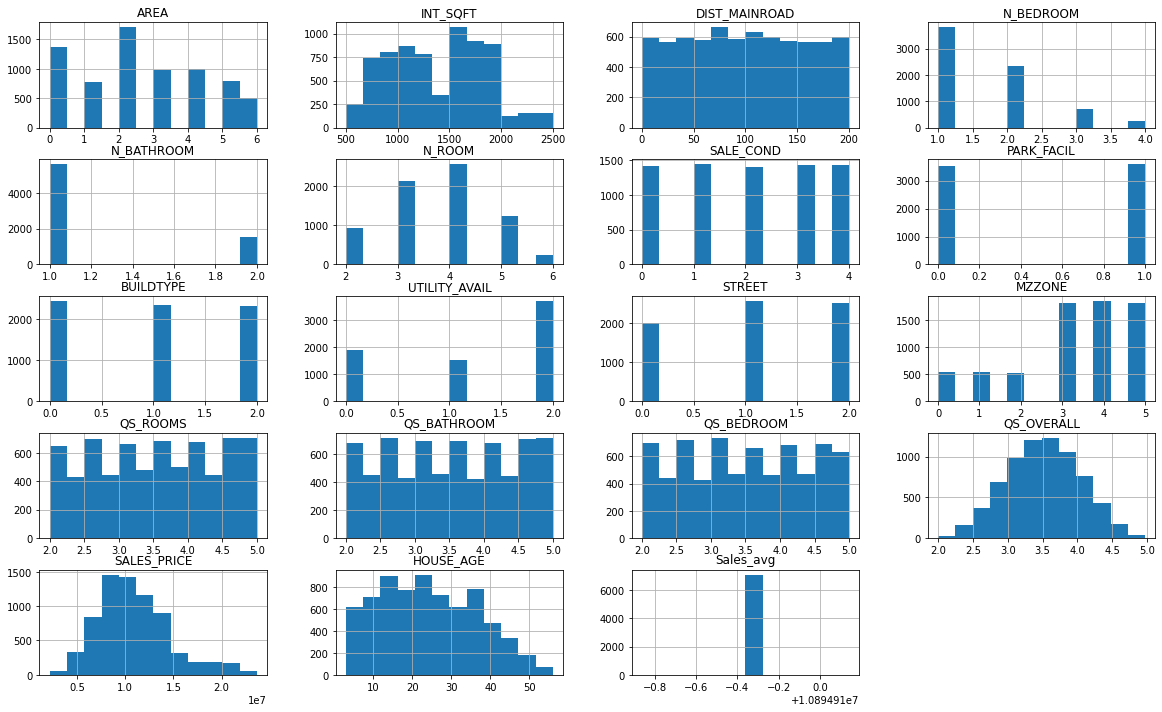

In [50]:
df2.hist(bins=12,figsize=(20,12))
plt.show()

#### Observations


*   We used the Histogram plot to know the frequency/distribution over the data sets 



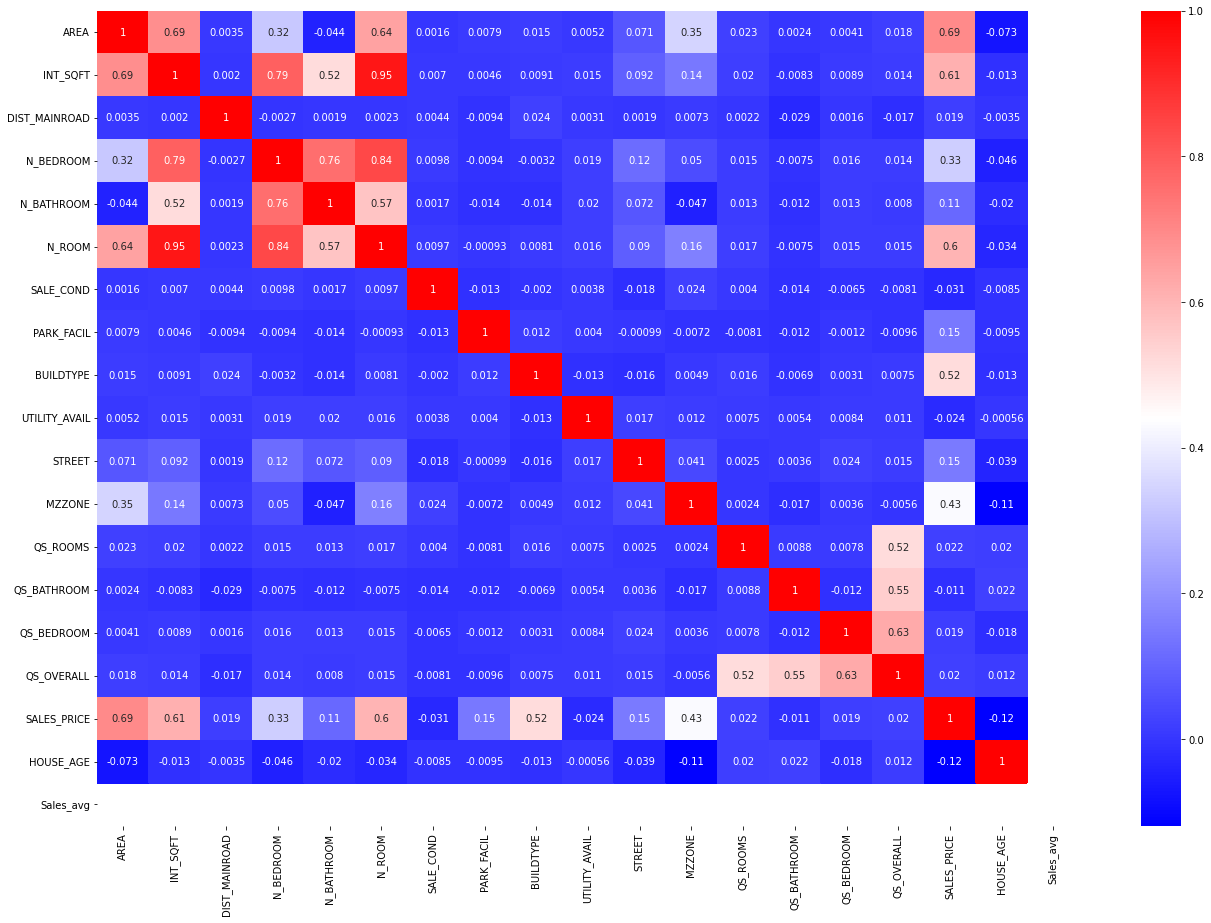

In [51]:
plt.figure(figsize=(22,15))
sns.heatmap(df2.corr(),cmap='bwr' ,annot=True)

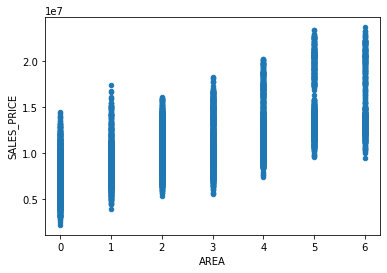

In [52]:
df2.plot.scatter(x='AREA', y='SALES_PRICE')

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   Int64  
 4   N_BATHROOM     7109 non-null   Int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   int64  
 9   UTILITY_AVAIL  7109 non-null   int64  
 10  STREET         7109 non-null   int64  
 11  MZZONE         7109 non-null   int64  
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  HOUSE_AGE      7109 non-null   int64  
 18  Sales_av

In [54]:
df2.corr()["SALES_PRICE"].sort_values(ascending = False)

SALES_PRICE      1.000000
AREA             0.694149
INT_SQFT         0.612125
N_ROOM           0.602760
BUILDTYPE        0.515717
MZZONE           0.427789
N_BEDROOM        0.330987
STREET           0.149589
PARK_FACIL       0.146428
N_BATHROOM       0.108834
QS_ROOMS         0.021967
QS_OVERALL       0.020485
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
QS_BATHROOM     -0.011377
UTILITY_AVAIL   -0.023812
SALE_COND       -0.030732
HOUSE_AGE       -0.119509
Sales_avg             NaN
Name: SALES_PRICE, dtype: float64

In [55]:
df3 = df2.copy()
df3.describe()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,Sales_avg
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7.109000e+03
mean,2.539738,1382.073006,99.603179,1.636939,1.213110,3.688704,2.003939,0.504572,0.983823,1.255029,1.070755,3.317344,3.517471,3.507244,3.485300,3.503254,1.089491e+07,24.286538,1.089491e+07
std,1.846837,457.410902,57.403110,0.802881,0.409534,1.019099,1.415302,0.500014,0.819289,0.849098,0.795794,1.498831,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.342829,0.000000e+00
min,0.000000,500.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000,1.089491e+07
25%,1.000000,993.000000,50.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000,1.089491e+07
50%,2.000000,1373.000000,99.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,1.033505e+07,23.000000,1.089491e+07
75%,4.000000,1744.000000,148.000000,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,2.000000,2.000000,5.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000,1.089491e+07
max,6.000000,2500.000000,200.000000,4.000000,2.000000,6.000000,4.000000,1.000000,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,56.000000,1.089491e+07


## Data Splitting

In [56]:
X = df3[["AREA","INT_SQFT","DIST_MAINROAD","N_BEDROOM", "N_BATHROOM" , "N_ROOM" , "QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","BUILDTYPE", "SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","HOUSE_AGE"]]
y = df3["SALES_PRICE"]
from sklearn.model_selection import train_test_split

In [57]:
print(X)
print(y)

      AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0        0      1004            131          1           1       3       4.0   
1        5      1986             26          2           1       5       4.9   
2        1       909             70          1           1       3       4.1   
3        3      1855             14          3           2       5       4.7   
4        0      1226             84          1           1       3       3.0   
...    ...       ...            ...        ...         ...     ...       ...   
7104     0       598             51          1           1       2       3.0   
7105     3      1897             52          3           2       5       3.6   
7106     3      1614            152          2           1       4       4.3   
7107     0       787             40          1           1       2       4.6   
7108     3      1896            156          3           2       5       3.1   

      QS_BATHROOM  QS_BEDROOM  QS_OVERA

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 101)
X_train

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDTYPE,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE
1161,5,1658,110,1,1,4,4.3,3.4,3.9,3.915,0,4,0,2,0,3,44
5318,2,1231,48,2,1,4,4.0,2.5,2.4,2.920,2,4,1,0,1,3,6
3219,2,832,98,1,1,3,3.6,4.9,3.9,4.210,0,0,1,1,1,4,17
6756,1,1089,18,1,1,3,3.2,4.4,2.6,3.140,0,1,1,2,0,1,27
130,5,1880,90,2,1,5,3.2,4.2,4.0,3.770,0,4,1,2,0,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2,1227,151,2,1,4,3.8,3.2,4.8,3.860,0,4,1,2,1,5,6
5695,6,1815,23,2,1,5,3.3,2.0,3.1,2.885,2,0,1,2,1,4,11
1361,1,936,106,1,1,3,2.6,2.8,3.9,3.290,1,3,1,1,1,3,24
1547,3,1851,100,3,2,5,4.7,3.7,4.7,4.250,1,4,0,1,1,5,16


## Scalling

In [59]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

#### Observations 


*   here we splitted the data to 70% as train and 30% as test
and we scalled the data using standard scaler



# Model Selection and evaluation

### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

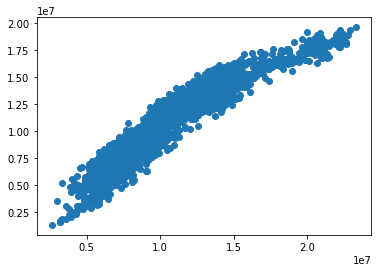

In [61]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

In [62]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X= X_train, y= y_train, cv=10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 87.86 %
Standard Deviation: 0.69 %


#### Cross validation for K Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsRegressor
kn_regressor = KNeighborsRegressor()

In [64]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = kn_regressor , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 82.92 %
Standard Deviation: 1.16 %


#### Cross validation for Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state = 0)

In [66]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_tree , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 95.90 %
Standard Deviation: 0.46 %


#### Cross validation for Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators= 10, random_state = 0)

In [68]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_forest , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 97.93 %
Standard Deviation: 0.20 %


#### Cross validation for XGBOOST

In [69]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective ='reg:squarederror')

In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = xg_reg , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 99.02 %
Standard Deviation: 0.11 %


In [71]:
Sc = pd.DataFrame({'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
                  'Cross-validation Score (%)' : [87.86 , 82.92, 95.90, 97.93, 99.02]})
Sc

,Model,Cross-validation Score (%)
0,Linear Regression,87.86
1,KNN,82.92
2,Decision Tree,95.90
3,Random Forest,97.93
4,XGBoost,99.02


#### Observations 


*   Here the XGBoost model gives the best score followed by Random Forest,Decision Tree, KNN and Linear Regression



In [72]:
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

In [73]:
from sklearn import metrics 
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Square :",metrics.r2_score(y_test, y_pred))

MAE: 279441.3435302391
MSE: 131900448098.17719
RMSE: 363181.0128547157
R2 Square : 0.9910493626292484


In [74]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(xg_reg)
sel.fit(X_train, y_train)

SelectFromModel(estimator=XGBRegressor(objective='reg:squarederror'))

In [75]:
features = X.columns[sel.get_support()]
features

Index(['AREA', 'INT_SQFT', 'N_ROOM', 'BUILDTYPE', 'MZZONE'], dtype='object')

#### Observations

*   As per the Problem statement the predictions are performing better with the r2 score of 0.9910493626292484 
*   Where the important features that are highly intrepting the SALES PRICE was AREA, INT_SQFT, N_ROOM, BUILDTYPE and MZZONE 





